IMPORTING THE DEPENDENCIES

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


DATA COLLECTION AND ANALYSIS

In [43]:
#loading the data from csv file to Pandas Dataframe
parkinson_data=pd.read_csv("/content/parkinsons.csv")
#Here are short descriptions of some of the variables in the Parkinson's disease dataset:

#'MDVP:Fo(Hz)': This variable represents the average vocal fundamental frequency measured in hertz (Hz) of sustained phonations from individuals with Parkinson's disease.

#'MDVP:Fhi(Hz)': This variable represents the highest vocal frequency measured in hertz (Hz) from individuals with Parkinson's disease.

#'MDVP:Flo(Hz)': This variable represents the lowest vocal frequency measured in hertz (Hz) from individuals with Parkinson's disease.

# 'MDVP:Jitter(%)': This variable represents the relative frequency variation of the vocal fundamental frequency in percentage from individuals with Parkinson's disease.

# 'MDVP:Jitter(Abs)': This variable represents the absolute frequency variation of the vocal fundamental frequency in hertz (Hz) from individuals with Parkinson's disease.

# 'MDVP:RAP': This variable represents the relative amplitude perturbation of the vocal fundamental frequency from individuals with Parkinson's disease.

# 'MDVP:PPQ': This variable represents the absolute amplitude perturbation of the vocal fundamental frequency from individuals with Parkinson's disease.

# 'Jitter:DDP': This variable represents the difference between successive differences in the vocal fundamental frequency from individuals with Parkinson's disease.

# 'MDVP:Shimmer': This variable represents the relative amplitude variation of the vocal signal from individuals with Parkinson's disease.

# 'MDVP:Shimmer(dB)': This variable represents the absolute amplitude variation of the vocal signal in decibels (dB) from individuals with Parkinson's disease.

In [44]:
#printing the first five rows of dataframe
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [45]:
#no. of rows and column in the dataframe
parkinson_data.shape

(195, 24)

In [46]:
#getting more information about the dataset
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [47]:
#another way of checking number of missing value in each column
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [48]:
#getting the statistical measure of the data
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


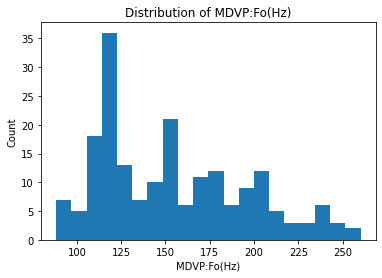

<Figure size 432x288 with 0 Axes>

In [49]:
# Create a histogram of the 'MDVP:Fo(Hz)' variable
plt.hist(parkinson_data['MDVP:Fo(Hz)'], bins=20)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Count')
plt.title('Distribution of MDVP:Fo(Hz)')
plt.show()
plt.savefig('histogram.png')

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


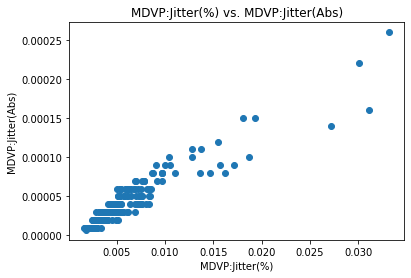

<Figure size 432x288 with 0 Axes>

In [51]:
# Create a scatter plot of 'MDVP:Jitter(%)' vs. 'MDVP:Jitter(Abs)'
plt.scatter(parkinson_data['MDVP:Jitter(%)'], parkinson_data['MDVP:Jitter(Abs)'])
plt.xlabel('MDVP:Jitter(%)')
plt.ylabel('MDVP:Jitter(Abs)')
plt.title('MDVP:Jitter(%) vs. MDVP:Jitter(Abs)')
plt.show()
plt.savefig('scatterplot.png')

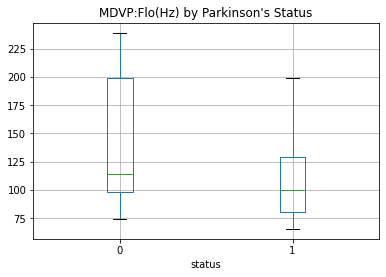

<Figure size 432x288 with 0 Axes>

In [52]:
# Create a box plot of 'MDVP:Flo(Hz)' by 'status'
parkinson_data.boxplot(column='MDVP:Flo(Hz)', by='status')
plt.title('MDVP:Flo(Hz) by Parkinson\'s Status')
plt.suptitle('')  # remove default title
plt.show()
plt.savefig('boxplot.png')

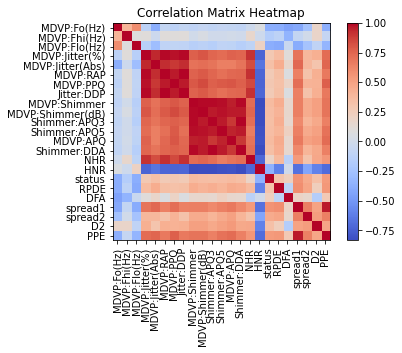

<Figure size 432x288 with 0 Axes>

In [53]:
# Create a correlation matrix heatmap
corr = parkinson_data.corr()
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar() 
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.savefig('heatmap.png')

In [54]:
#distribution of Target variable
parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1---> Parkinson's Positive

0---> Parkinson's Negative

In [55]:
#generating the data based on the mean value
parkinson_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


DATA PREPROCESSING


In [56]:
#now , we have analyzed a data a bit , we'll do data Preprocessing Now
X=parkinson_data.drop(columns=['name','status'],axis=1)
Y=parkinson_data['status']

In [57]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [58]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


SPLITTING THE DATA TO TRAINING AND TESTING DATA

In [59]:
#we'll create 4 arrays
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,stratify=Y,random_state=2)

In [60]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


DATA STANDARDIZATION

In [61]:
scaler=StandardScaler()

In [62]:
#data standardization using standard scalar , to convert the values in the same range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# The reason why we don't apply the fit() function to the test data is that it can cause data leakage.

# Data leakage occurs when information from the test set is used to scale the training set, which can result in overly optimistic performance estimates. The fit() function estimates the parameters (e.g., mean and standard deviation) of the scaler based on the training data, and applying the fit() function to the test data would introduce information from the test set into the scaler.

# Instead, we apply the transform() function to the test data after fitting the scaler on the training data. The transform() function applies the scaling parameters estimated from the training data to the test data, ensuring that the test set is scaled in the same way as the training set, without any information leakage from the test set.

# In summary, we apply fit() to the training data to estimate the scaling parameters, and then apply transform() to both the training and test data using the same parameters to ensure that they are scaled consistently.

In [63]:
print(X_train)

[[-3.37789850e-01 -1.86151275e-01 -9.11085922e-01 ...  3.02808525e-01
   3.67380761e-01 -1.01626972e-01]
 [ 1.09942206e+00  2.52399879e-01  7.59431971e-01 ...  9.62684763e-01
   2.30410182e-01  7.25430092e-03]
 [-8.75220075e-01 -5.64868721e-01 -3.69947894e-01 ... -1.24083946e-03
  -1.27562573e+00 -5.03037967e-01]
 ...
 [ 9.67834202e-01  1.38914623e-01 -8.24451036e-01 ...  5.83176337e-01
   5.94403638e-01 -2.56870663e-01]
 [-7.69983726e-01 -6.17537239e-01 -4.08691589e-01 ...  2.01206260e-01
  -9.18334164e-01 -4.43401072e-01]
 [ 1.19847659e+00  4.93351249e-01  1.11785168e+00 ... -1.03979251e-01
   5.12603529e-01 -5.39510027e-01]]


# **MODEL TRAINING**

Support Vector Machine Model

In [64]:
#we are using SVM , to train our model
#classifier are used for classification problems which are used to classify values or data points
#Regressor-> to get a particular integer or decimal value , we;ll use a regressor
#SVM are used for both binary classification and regression preblems
#here we are going to use it for classification only

model=svm.SVC

In [65]:
#training the svm model with training data
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

# **MODEL EVALUATION**

Accuracy Score

In [66]:
#accuracy score on training data
X_train_prediction=model.predict(X_train) #, So this model is trained , we can now use the features alnoe ,it will predict whether the person has parkinson disease or not
training_data_accuracy =accuracy_score(Y_train,X_train_prediction)
print("Accuracy Score of training data: ",training_data_accuracy)

Accuracy Score of training data:  0.8974358974358975


In [67]:
#accuracy score for test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy on Test Data: ",test_data_accuracy)

Accuracy on Test Data:  0.8974358974358975


**BUILDING A PREDICTIVE SYSTEM**

In [72]:
input_data=(171.04100,208.31300,75.50100,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,0.18600,0.00889,0.01169,0.01872,0.02666,0.01095,25.90800,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403)
#changing input data to a numpy array
input_data_as_array=np.asarray(input_data)
#reshaping the numpy array
input_data_reshaped=input_data_as_array.reshape(1,-1)

#standardizing the data
std_data=scaler.transform(input_data_reshaped)

prediction=model.predict(std_data)
print(prediction)

#here prediction is a list
if (prediction[0]==0):
  print("The Person does not have Parkinson Disease")
else:
  print("The Person has Parkinson Disease")


[1]
The Person has Parkinson Disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
